# Bharat Intern Task 1

# Importing Libraries

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns

# Importing the Dataset

In [78]:
df = pd.read_csv('spam (1).csv',encoding='latin-1')

# Displaying the top five rows from dataset

In [79]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [80]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [81]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [82]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message,label_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Data Visualization

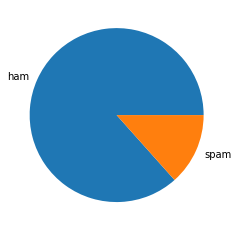

In [97]:
import matplotlib.pyplot as plt

plt.pie(df.label.value_counts(), labels=['ham', 'spam'])
plt.show()

In [98]:
avg_word_count = round(sum([len(i.split()) for i in df['message']]) / len(df['message']))
avg_word_count

15

In [99]:
word_set = set()
for i in df.message:
    for j in i.split():
        word_set.add(j)

total_words_length = len(word_set)
print(total_words_length)

15585


# Splitting the dataset

In [100]:
from sklearn.model_selection import train_test_split

x = df['message']
y = df['label_encoded']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer().fit(x_train)
x_train_vec, x_test_vec = tfidf_vec.transform(x_train), tfidf_vec.transform(x_test)

# Training the Classifier

In [102]:
from sklearn.naive_bayes import MultinomialNB

baseline_model = MultinomialNB()
baseline_model.fit(x_train_vec, y_train)

MultinomialNB()

# Model Evaluation

In [103]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = baseline_model.predict(x_test_vec)

nb_accuracy = accuracy_score(y_test, y_pred)
print(nb_accuracy)
print(classification_report(y_test, y_pred))

0.9695067264573991
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       978
           1       1.00      0.75      0.86       137

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



# Model Visualization

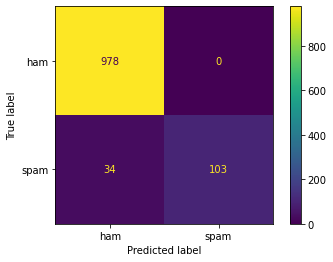

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['ham', 'spam'])
fig.plot()

In [105]:
df.isna().sum()

label            0
message          0
label_encoded    0
dtype: int64

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

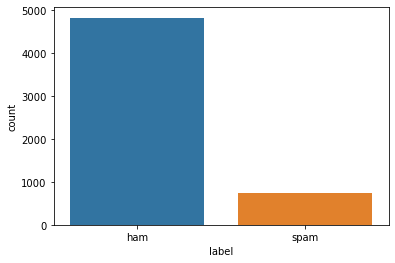

In [112]:
sns.countplot(df['label'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
